In [1]:
import keras
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
%matplotlib inline

In [2]:
n_pts = 500
centers =[[-1,1],[-1,-1],[1,-1],[1,1],[0,0]]
X,Y = datasets.make_blobs(n_samples = n_pts,random_state = 123,centers = centers,cluster_std = 0.4)

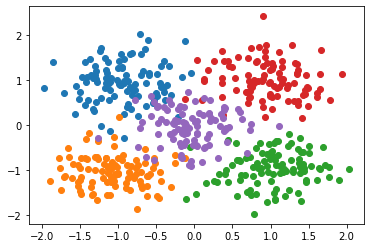

In [3]:
plt.scatter(X[Y==0,0],X[Y==0,1])
plt.scatter(X[Y==1,0],X[Y==1,1])
plt.scatter(X[Y==2,0],X[Y==2,1])
plt.scatter(X[Y==3,0],X[Y==3,1])
plt.scatter(X[Y==4,0],X[Y==4,1])

In [4]:
Y_cat = to_categorical(Y,5)
model = Sequential()
model.add(Dense(units=5,input_shape=(2,),activation='softmax'))
model.compile(Adam(0.1),loss='categorical_crossentropy',metrics=['accuracy'])
h = model.fit(x=X,y=Y_cat,verbose=1,batch_size=50,epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 1.3743 - accuracy: 0.4760
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.8320
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4387 - accuracy: 0.9140
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3470 - accuracy: 0.9400
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3030 - accuracy: 0.9420
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2745 - accuracy: 0.9440
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2557 - accuracy: 0.9500
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2435 - accuracy: 0.9420
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2317 - accuracy: 0.9440
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2216 - accuracy: 0.9540
Epoch 11/

10/10 [==============================] - 0s 3ms/step - loss: 0.1521 - accuracy: 0.9520
Epoch 84/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1511 - accuracy: 0.9480
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1525 - accuracy: 0.9500
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1521 - accuracy: 0.9520
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1515 - accuracy: 0.9460
Epoch 88/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1510 - accuracy: 0.9500
Epoch 89/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1519 - accuracy: 0.9480
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.9500
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1513 - accuracy: 0.9500
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1507 - accuracy: 0.9500
Epoch 93/100


In [5]:
def plot_decision_boundary(X,Y_cat,model):
    x_span = np.linspace(min(X[:,0])-1,max(X[:,0])+1,50)
    y_span = np.linspace(min(X[:,1])-1,max(X[:,1])+1,50)
    xx,yy = np.meshgrid(x_span,y_span)
    xx_,yy_ = xx.ravel(),yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = np.argmax(model.predict(grid), axis=-1)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

79/79 [==============================] - 0s 2ms/step


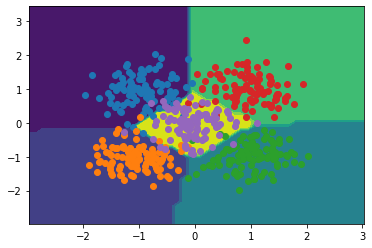

In [6]:
plot_decision_boundary(X,Y_cat,model)
plt.scatter(X[Y==0,0],X[Y==0,1])
plt.scatter(X[Y==1,0],X[Y==1,1])
plt.scatter(X[Y==2,0],X[Y==2,1])
plt.scatter(X[Y==3,0],X[Y==3,1])
plt.scatter(X[Y==4,0],X[Y==4,1])

1/1 [==============================] - 0s 25ms/step
Prediction is: [2]


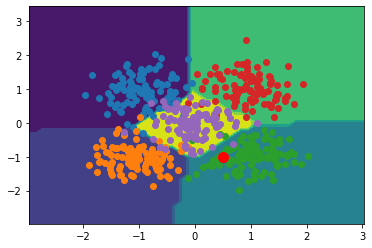

In [7]:
plot_decision_boundary(X,Y_cat,model)
plt.scatter(X[Y==0,0],X[Y==0,1])
plt.scatter(X[Y==1,0],X[Y==1,1])
plt.scatter(X[Y==2,0],X[Y==2,1])
plt.scatter(X[Y==3,0],X[Y==3,1])
plt.scatter(X[Y==4,0],X[Y==4,1])
x = 0.5
y = -1
point = np.array([[x,y]])
prediction = np.argmax(model.predict(point), axis=-1)
plt.plot([x],[y],marker = 'o',markersize = 10,color = 'red')
print(f"Prediction is: {prediction}")